In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

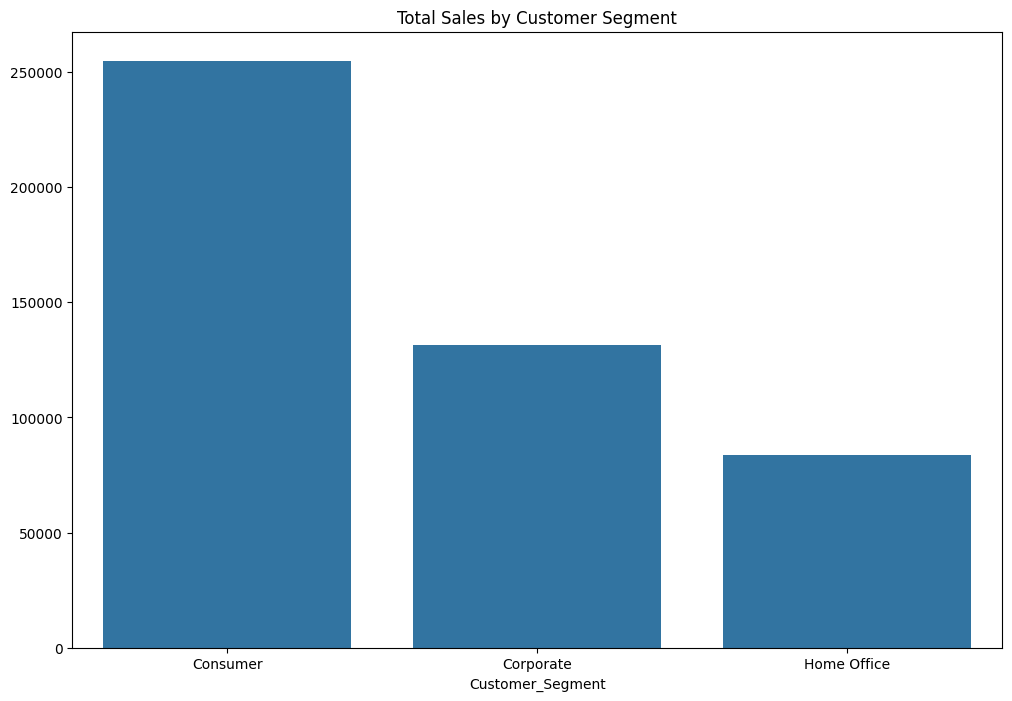

In [3]:
df = pd.read_csv("/Users/branly/Desktop/Python Project/Sales Perfomance Analysis.csv")

segment_sales = df.groupby('Customer_Segment')['Sales'].sum().sort_values(ascending=False)

category_sales = df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

location_sales = df.groupby(['Order_Country', 'Order_State', 'Order_City'])['Sales'].sum().sort_values(ascending=False)

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Total Sales by Customer Segment')
plt.show()


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/913835063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


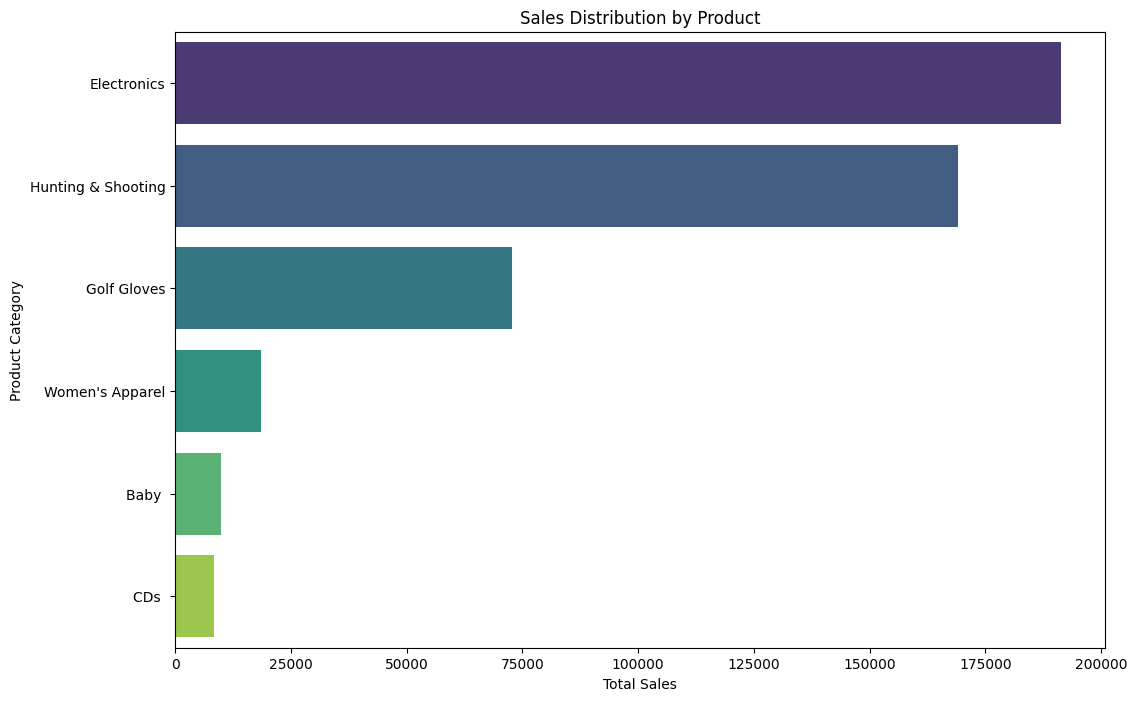

In [4]:
product_sales = df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Sales Distribution by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/3831434296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/3831434296.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")


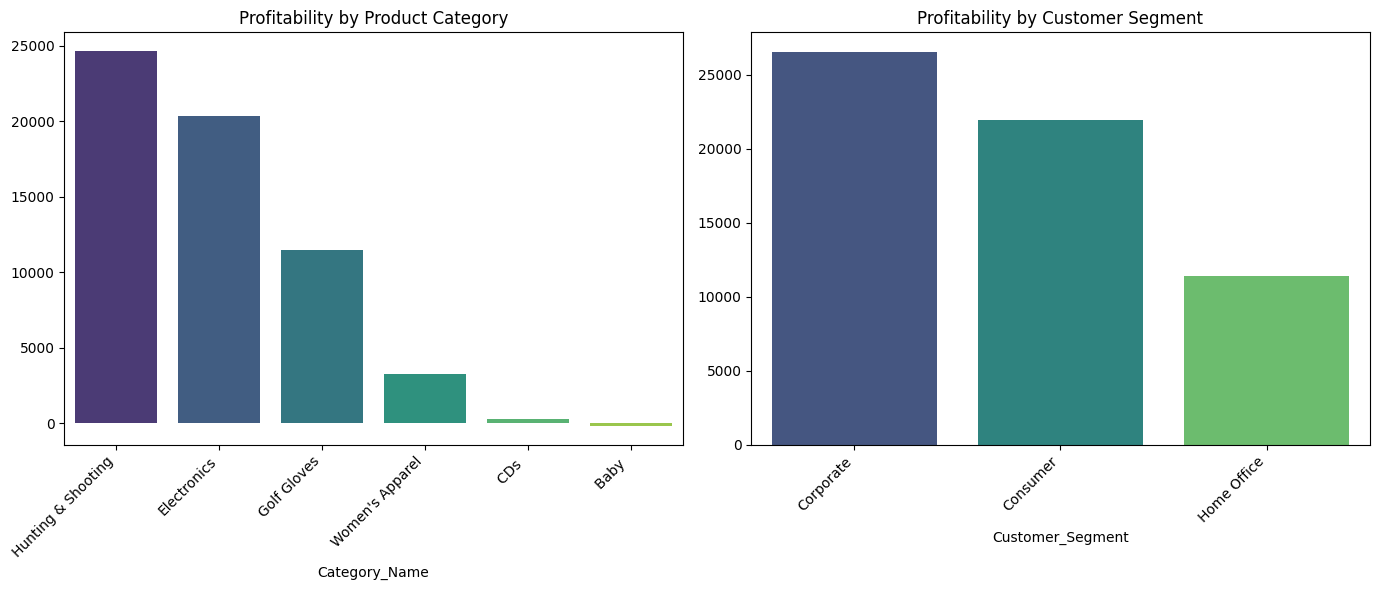

In [5]:
df2 = pd.read_csv("/Users/branly/Desktop/Python Project/Profit_A.csv")

category_profitability = df2.groupby('Category_Name')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)
segment_profitability = df2.groupby('Customer_Segment')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
plt.title('Profitability by Product Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")
plt.title('Profitability by Customer Segment')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/3170993439.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')


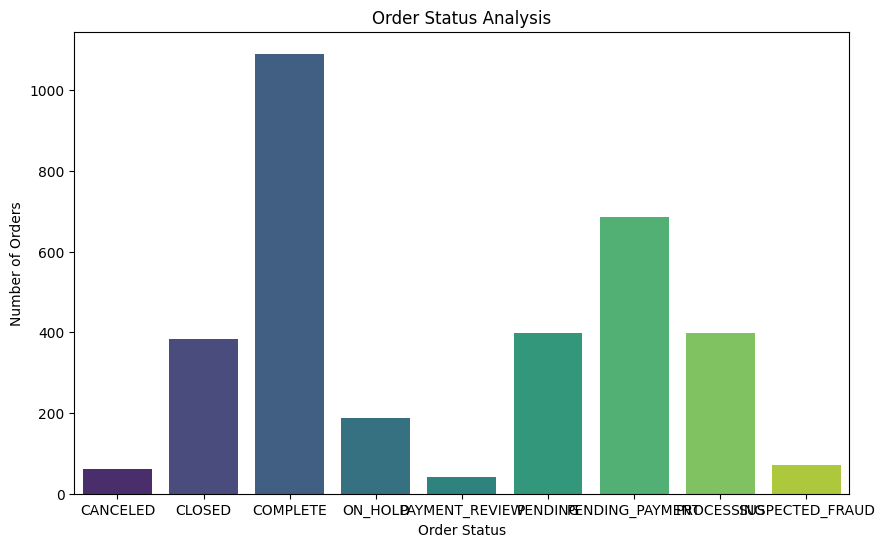

In [6]:
order_status_counts = df['Order_Status'].value_counts()

order_status_df = pd.DataFrame({'Order_Status': order_status_counts.index, 'Count': order_status_counts.values})

order_status_pivot = order_status_df.pivot_table(index='Order_Status', values='Count', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')
plt.title('Order Status Analysis')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

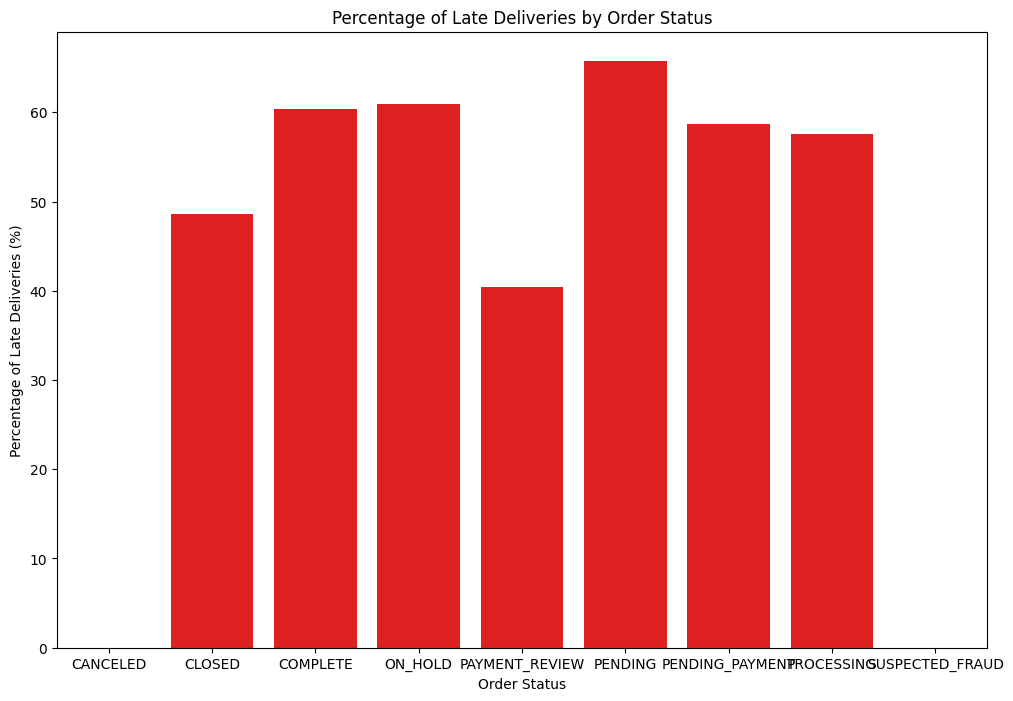

In [7]:
df3 = pd.read_csv("/Users/branly/Desktop/Python Project/Late Delivery risk.csv")

late_deliveries = df3[df3['Late_delivery_risk'] == 1]

late_delivery_counts = late_deliveries['Order_Status'].value_counts()

total_order_counts = df['Order_Status'].value_counts()

late_delivery_percentage = (late_delivery_counts / total_order_counts) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=late_delivery_percentage.index, y=late_delivery_percentage.values, color='red')
plt.title('Percentage of Late Deliveries by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Percentage of Late Deliveries (%)')
plt.show()


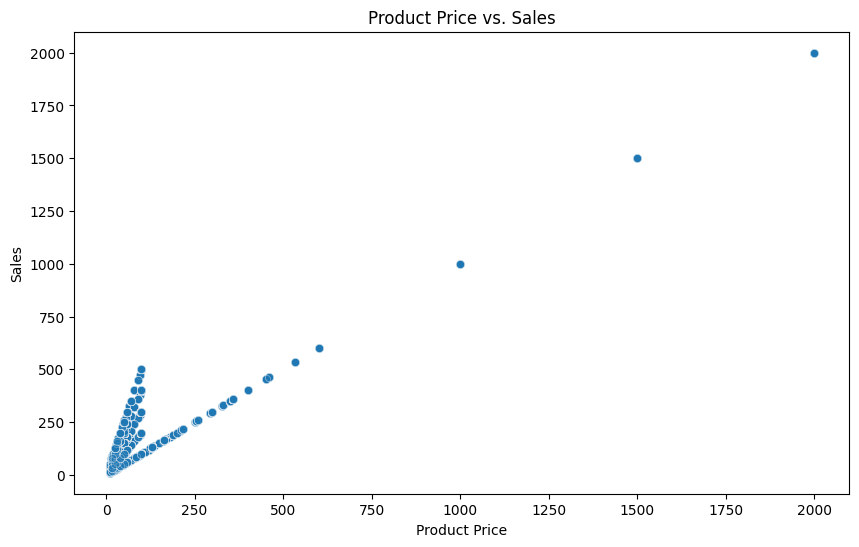

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/2299335958.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df4, ci=None)


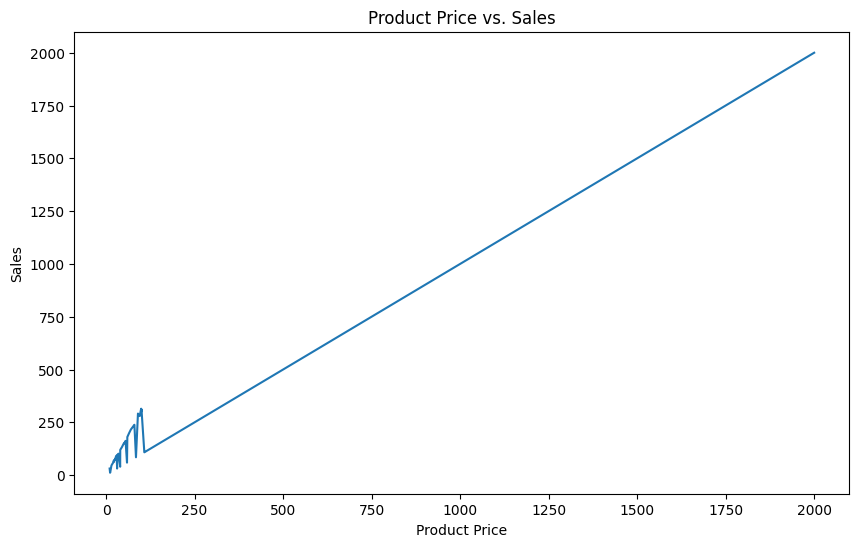

In [14]:
df4 = pd.read_csv("/Users/branly/Desktop/Python Project/Price:sales.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Item_Product_Price', y='Sales', data=df4, alpha=0.5)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df4, ci=None)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

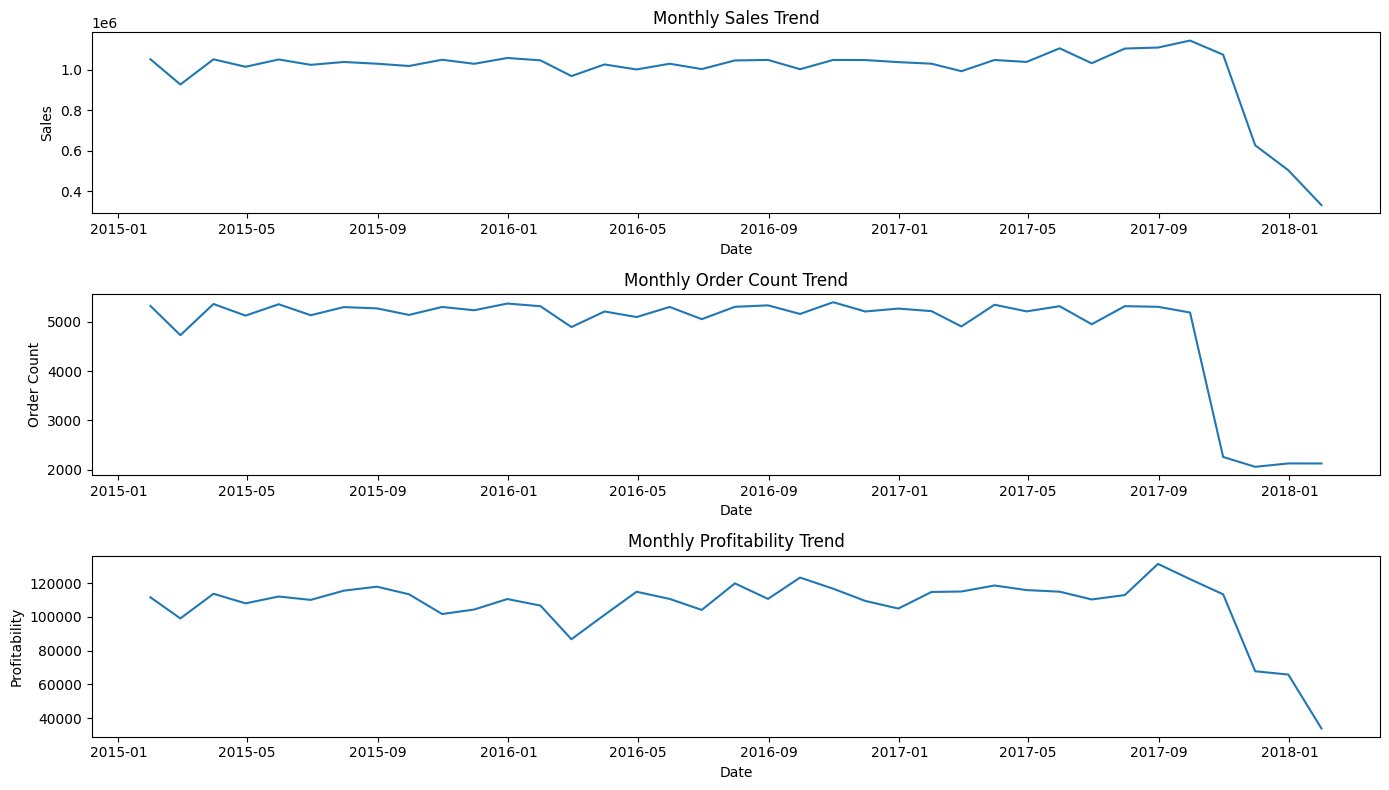

In [18]:
df5 = pd.read_csv("/Users/branly/Desktop/Python Project/TSer.csv")

df5['OrderDate'] = pd.to_datetime(df5['OrderDate'])


df5.set_index('OrderDate', inplace=True)


monthly_data = df5.resample('M').agg({
    'Sales': 'sum',
    'Order_Id': 'count',  
    'Order_Profit_Per_Order': 'sum'  
})


plt.figure(figsize=(14, 8))

# Sales trend
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Order count trend
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Id')
plt.title('Monthly Order Count Trend')
plt.xlabel('Date')
plt.ylabel('Order Count')

# Profitability trend
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Profit_Per_Order')
plt.title('Monthly Profitability Trend')
plt.xlabel('Date')
plt.ylabel('Profitability')

plt.tight_layout()
plt.show()

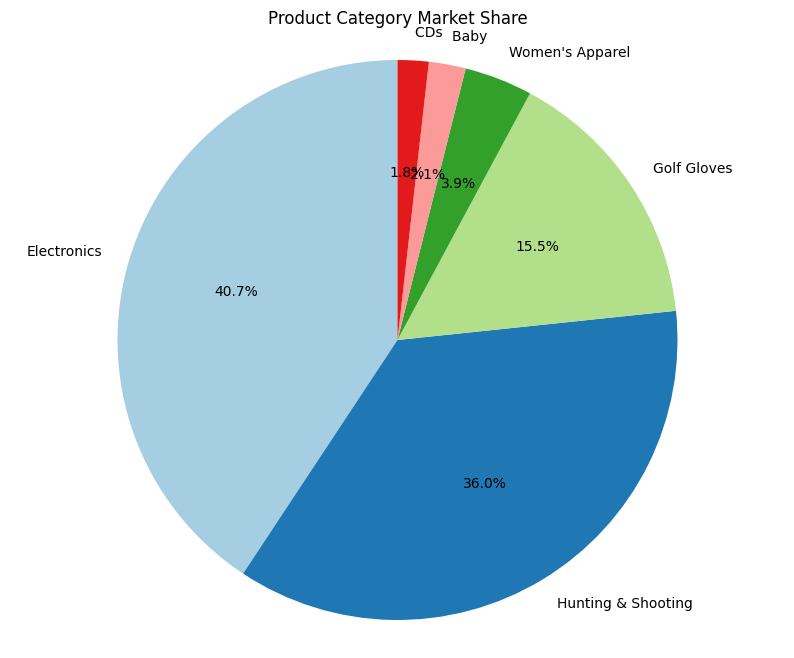

In [24]:

category_sales = df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)


market_share = category_sales / category_sales.sum()


plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(category_sales)))


plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Product Category Market Share')
plt.axis('equal')  
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_63558/2925984702.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




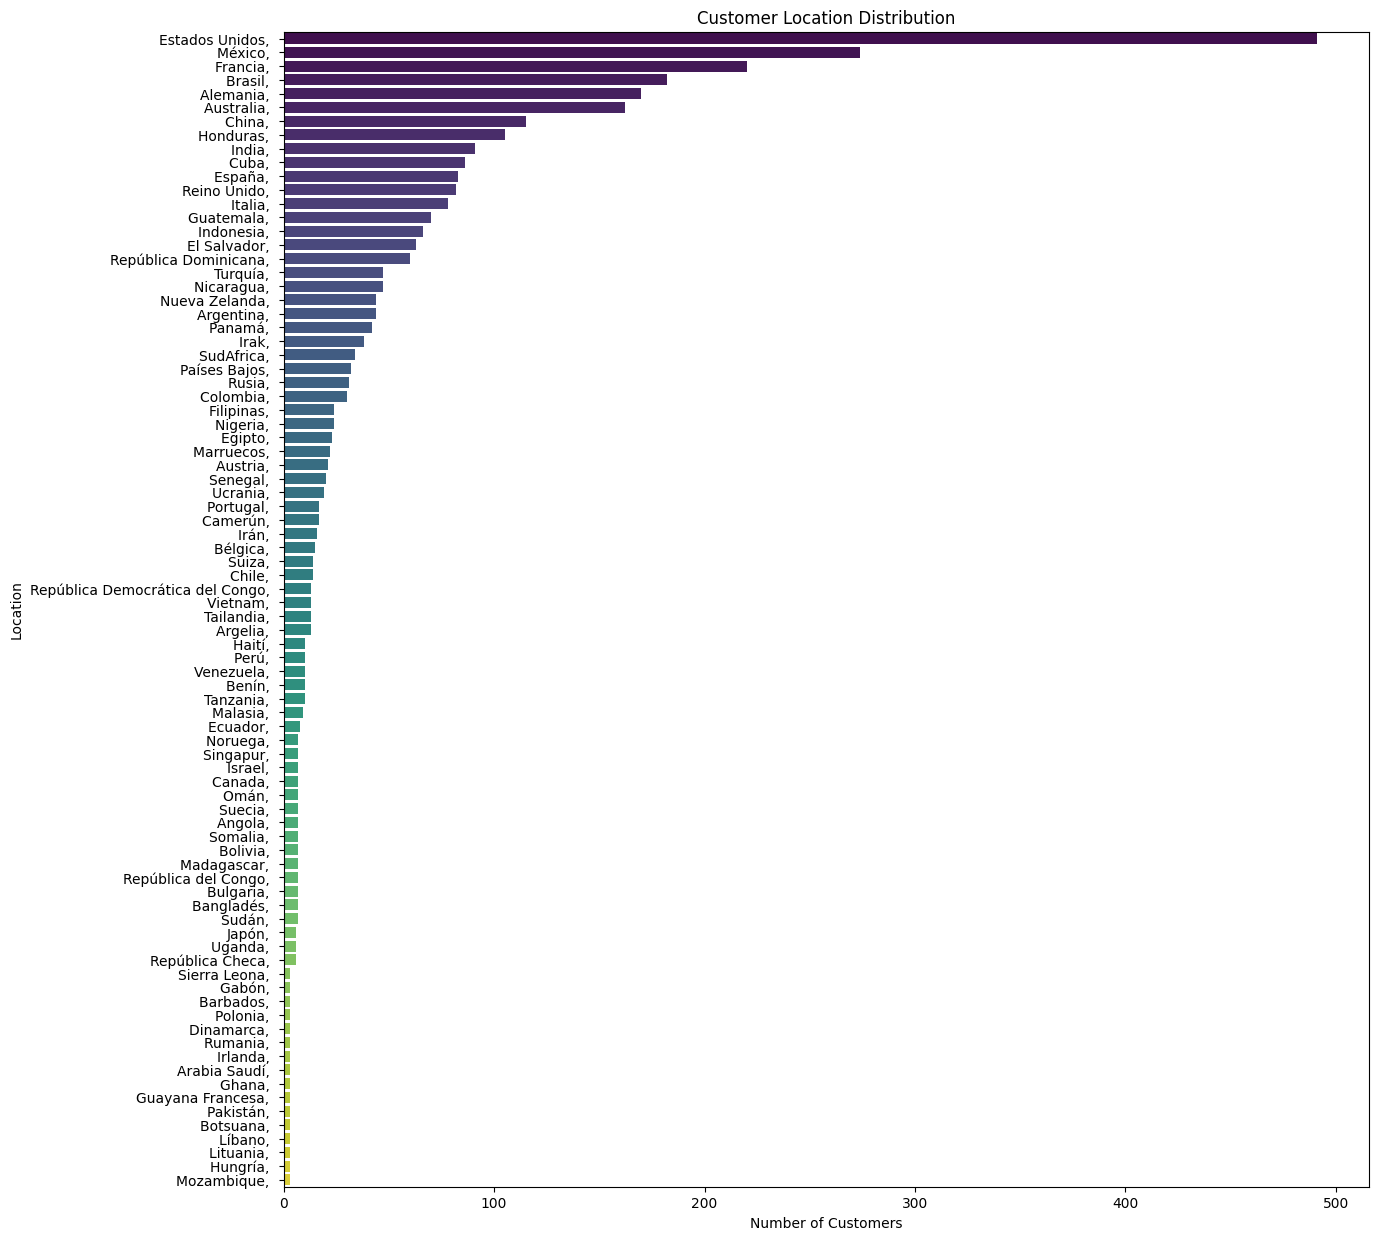

In [29]:

df['Location'] = df['Order_Country'] + ', ' #+ df['Order_State'] + ', ' #+ df['Order_City']


location_counts = df['Location'].value_counts()

# Plotting
plt.figure(figsize=(14, 15))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Customer Location Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.show()
